In [24]:
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os 
import gc

In [25]:
path = '/home/jua/corsika/run/energy_var/npz/square/all/'
filelist = os.listdir(path)
gList = {}
pList = {}
for file in filelist:
    n = int(file.split('_')[2][-1])
    if file.split("_")[0]=='gamma':
        gList[n-1]=path+file
    if file.split("_")[0]=='proton':
        pList[n-1]=path+file

In [30]:
def plotting(histoBin, glist, plist, Bin):
    gnumEvt = []
    pnumEvt = []
    logbins = np.logspace(np.log10(100),np.log10(100000),histoBin)
    #fig, ax = plt.subplots(1,Bin,figsize=(7*Bin,7))
    fig, ax = plt.subplots(3,3,figsize=(35,35))
    for i in range(3):
        for j in range(3):
            if j+i*3==8:
                x = []
                y = []
            else:
                garr = np.load(glist[j+i*3])
                parr = np.load(plist[j+i*3])
                x = garr['energy']
                y = parr['energy']

            gnumEvt.append(len(x))
            pnumEvt.append(len(y))

            n, bins, patches = ax[i][j].hist(x, bins=logbins, color='tab:orange',alpha=0.6,label='gamma')
            n, bins, patches = ax[i][j].hist(y, bins=logbins, color='tab:blue',alpha=0.6,label='proton')

            #ax[i][j].set(title='Energy distribution (B={})'.format(j+1+i*3))
            #ax[i][j].set_title('B={}'.format(j+1+i*3), fontsize=35)
            if i == 2 and j==1:
                ax[i][j].set_xlabel('Energy [GeV]',fontsize=50)
                ax[i][j].xaxis.set_label_coords(0.5, -0.15)
            #ax[i][j].set_ylabel('# of Event',fontsize=28)
            if i == 1 and j==0:
                ax[i][j].set_ylabel('# of Event',fontsize=55)
                ax[i][j].yaxis.set_label_coords(-0.25,0.5)

            ax[i][j].set_xscale('log')
            if i==0 and j==0:
                ax[i][j].legend(fontsize=40,loc = (0.48,0.75))
                #ax[i][j].legend(fontsize=40,bbox_to_anchor=(0.48, 0.75, 0.5, 0.5))
                
                #ax[i][j].legend(fontsize=35) 
            #ax[i][j].set_xticklabels(fontsize=16)
            ax[i][j].tick_params(axis = 'both', labelsize =38)
            #ax[i][j].tick_params(axis = 'y', labelsize =38)
            ty = 0.88
            tx = 0.15
            #if i!=0:
            #    tx = 0.25
            t = ax[i][j].text(tx, ty,'B={}'.format(j+1+i*3), alpha=1,
                 va="center", ha="center", size=60, transform=ax[i][j].transAxes)
            t.set_bbox(dict(facecolor='white', alpha=1,edgecolor='white'))
            
    #st = fig.suptitle("Energy Distribution", fontsize=110, y=0.96)
    plt.savefig('../plots/energy_distribution/energy_distribution.pdf')
    plt.show()
    print('# of Gamma Event : ' ,gnumEvt)
    print('# of Proton Event : ',pnumEvt)

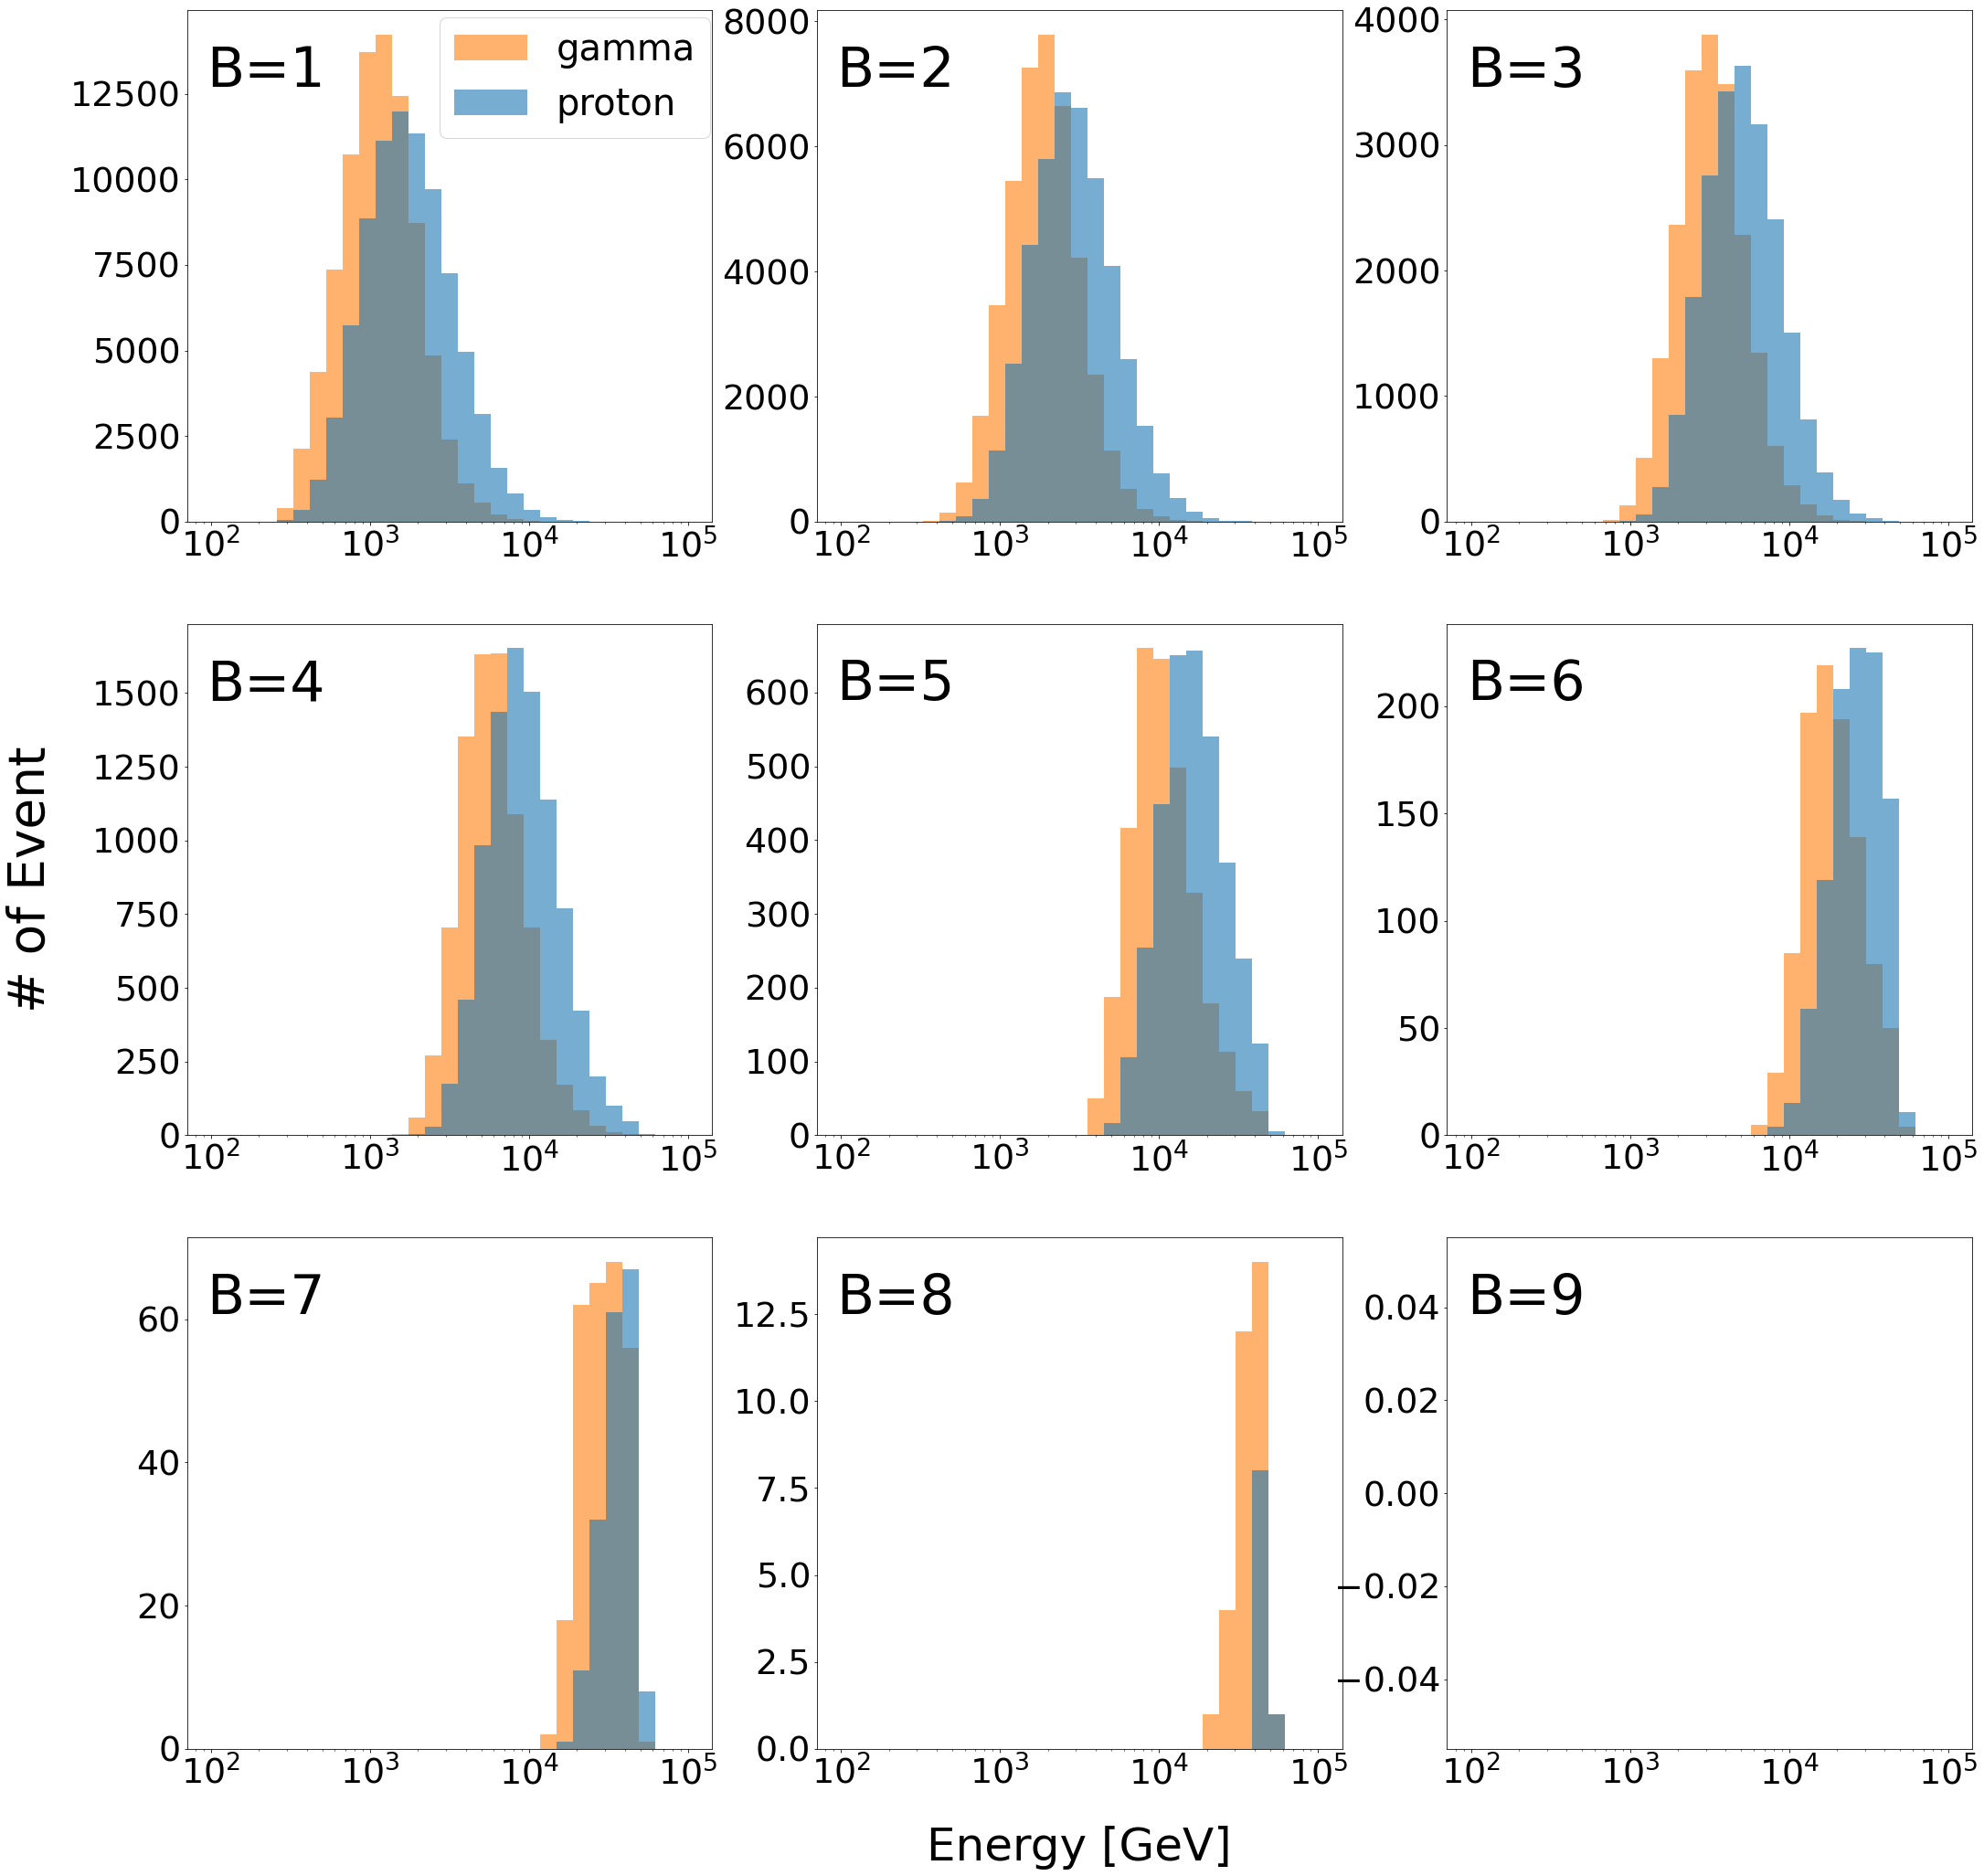

# of Gamma Event :  [83300, 41659, 19998, 8087, 3174, 1004, 272, 32, 0]
# of Proton Event :  [81720, 42929, 21366, 8932, 3419, 1035, 182, 9, 0]


In [31]:
plotting(30, gList, pList, 9)